<a href="https://colab.research.google.com/github/kumoromilee/bsc_dpdm22/blob/main/%5Bdataprep%5D_property_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##สรุปข้อมูลของนักประเมินแต่ละคน โดยพิจารณาจาก ความมั่นใจในการประเมิน ประะเมินราคาซื้อ-ขาย ให้คะแนนทรัพย์



In [ ]:

import pandas as pd

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
home= pd.read_excel ('/content/drive/MyDrive/data/คำตอบนักประเมิน.xlsx',sheet_name='บ้าน') ###ประกาศตัวแปร แล้วกำหนด sheet_name
home

     

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2,https://nayoo.co/khonkaen/posts/19495,บ้านเดี่ยว,มั่นใจ,5500000.0,5000000.0,"ราคาเสนอขาย 20,000-30,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
186,2,https://nayoo.co/khonkaen/posts/19496,บ้านเดี่ยว,มั่นใจ,7911000.0,7400000.0,"ราคาเสนอขาย 20,000 - 30,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
187,2,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2000000.0,2500000.0,ราคาเสนอขาย 2.2-3.0 ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
188,2,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4000000.0,3900000.0,ราคาเสนอขาย 3.5-4.0ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


In [28]:
est1 = home[home['ID ผู้ประเมิน']==1]
est1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3500000.0,"5,000-18,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,"5,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,https://nayoo.co/khonkaen/posts/19495,บ้านเดี่ยว,มั่นใจ,5500000.0,4500000.0,"3,000-30,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
156,1,https://nayoo.co/khonkaen/posts/19496,บ้านเดี่ยว,มั่นใจ,7911000.0,5200000.0,"3,000-30,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
157,1,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2000000.0,3600000.0,"3,000-30,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
158,1,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4000000.0,4000000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


In [29]:
est1.describe() 

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,100.0,1.000000e+02,1.000000e+02,0.0,0.0,0.0,0.0,1.0
mean,1.0,4.316360e+06,3.938500e+06,NaN,NaN,NaN,NaN,100.0
std,0.0,2.865391e+06,2.368553e+06,NaN,NaN,NaN,NaN,NaN
min,1.0,3.900000e+05,6.000000e+05,NaN,NaN,NaN,NaN,100.0
25%,1.0,2.892750e+06,2.775000e+06,NaN,NaN,NaN,NaN,100.0
50%,1.0,3.962000e+06,3.600000e+06,NaN,NaN,NaN,NaN,100.0
75%,1.0,5.000000e+06,4.500000e+06,NaN,NaN,NaN,NaN,100.0
max,1.0,2.094900e+07,1.600000e+07,NaN,NaN,NaN,NaN,100.0


In [ ]:
###นับคะแนนความมั่นใจ

In [39]:
est1['ประเมินราคาซื้อ-ขาย'].describe()

count    1.000000e+02
mean     3.938500e+06
std      2.368553e+06
min      6.000000e+05
25%      2.775000e+06
50%      3.600000e+06
75%      4.500000e+06
max      1.600000e+07
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [38]:
est1['ความมั่นใจในการเมินราคาทรัพย์'].describe() 

count        100
unique         1
top       มั่นใจ
freq         100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: object

In [40]:
est1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

In [41]:
est1.groupby('ให้คะแนนทรัพย์')['ให้คะแนนทรัพย์'].count()

ให้คะแนนทรัพย์
1 ขายไม่ได้แน่นอน                      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
Name: ให้คะแนนทรัพย์, dtype: int64

In [43]:
est2 = home[home['ID ผู้ประเมิน']==2]
est2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,NaN,NaN,NaN,NaN,NaN
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2,https://nayoo.co/khonkaen/posts/19495,บ้านเดี่ยว,มั่นใจ,5500000.0,5000000.0,"ราคาเสนอขาย 20,000-30,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
186,2,https://nayoo.co/khonkaen/posts/19496,บ้านเดี่ยว,มั่นใจ,7911000.0,7400000.0,"ราคาเสนอขาย 20,000 - 30,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
187,2,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2000000.0,2500000.0,ราคาเสนอขาย 2.2-3.0 ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
188,2,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4000000.0,3900000.0,ราคาเสนอขาย 3.5-4.0ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


In [44]:
est2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       89
ไม่มั่นใจ     1
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [45]:
est2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     64
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      23
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     1
Name: ให้คะแนนทรัพย์, dtype: int64

###เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย ใช้ MAPE เป็นเกณฑ์ในการเปรียบเทียบ

####hint เริ่มต้นมาเราอยากได้ตารางรูปแบบนี้ก่อน

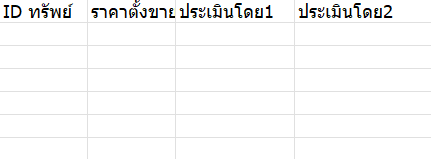